<a href="https://colab.research.google.com/github/smwalter96/PUS2020_MWalter/blob/master/HW8/Hw8_London_Chicago_MatthewWalter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Following the paper "Examining the feasibility of using open data to benchmark building energy usage in cities: A data science and policy perspective" [Roth et al 2019](https://www.researchgate.net/publication/337074109_Examining_the_feasibility_of_using_open_data_to_benchmark_building_energy_usage_in_cities_A_data_science_and_policy_perspective), choose 2 cities in the dataset available through the paper's github repository https://github.com/Urban-Informatics-Lab/Open-Data-Benchmarking

This paper is an excellent example of reproducible research. 

I also created an example of using random forest classifier and regressors here https://github.com/fedhere/PUS2020_FBianco/blob/master/classdemos/COVID19LOS_featureExtractionRFexample.ipynb and there are links at the bottom of this notebook to useful functions and examples on the internet of applications of methods you will need to use.

1. Read the introduction to the paper and describe here (briefly) the goals of their analysis (and the analysis that you are about to reproduce). Max 200 words.
2. Choose 2 cities (any 2 cities except Seattle cause I am running some of the Seattle analysis below for guidance)
3. For each of the 2 cities reproduce their analysis by 

  3.1 gathering the original data from their repository (see below for Seattle example)

  3.2 clean the data according to their data preparation scheme, including one-hot-encoding categorical variables, except to impute missing data using KNearestNeighors instead of Gibbs sampling (see below)

  3.3 run a Random Forest (RF) Regressor to predict the total energy consumption.

  3.4 evaluate the RF model performance by printing the R2 score (the default score in SKLearn RF) for training and test set (discuss)

  3.5 plot the features sorted by their importance and identify the most important features. are they consistent between the 2 cities? are they consistent with the paper's result?
4 compare the result for the 2 cities (discuss)

5. Extra credit: 

  5.1 modify the target variable to a binary variable choosing the median of the variable values as the the energy threshold and predict whether the value is higher or lower than the threshold
  5.2 Run a Random Forest Classifier to predict if an observation is in the upper 50% percentile or lower 50% percentile (above or below the median threshold)
  5.3 Measure the performance of the model on training and test data
  5.4 Measure the feature importance and assess if the important feature have changed (discuss)

Buildings are responsible for the majority of carbon emissions and energy consumption within urban areas. Energy benchmarking is the practice of buildings reporting their energy consumption to goverment agencies to calculate energy performance based on a buildings type and characteristics. This paper wants to address a lack in understanding of this benchmarking process which is based on open data. To do this, benchmarking is compared to current practices and the importance of each variable in energy consumption is determined to understand what variables are important in determining a buildings energy consumption.

In [1]:
import pandas as pd
import numpy as np

London

# choose a city and read in the data

In [2]:
lon = pd.read_csv("https://raw.githubusercontent.com/Urban-Informatics-Lab/Open-Data-Benchmarking/master/London/london_2010.csv")

# inspect the dataframe

In [3]:
lon.describe()

,ENERGY_RATING,TOTAL_CO2_EMISSIONS,FLOOR_AREA,ANNUALENERGYUSEFUELTHERMAL,ANNUALENERGYUSEELECTRICAL,TYPICALENERGYUSEFUELTHERMAL,TYPICALENERGYUSEELECTRICAL,RENEWABLESTHERMAL,RENEWABLESELECTRICAL,ACTUAL_ANNUAL_HEAT_TOTAL,ACTUAL_ANNUAL_ELEC_TOTAL,TYPICAL_ANNUAL_HEAT_TOTAL,TYPICAL_ANNUAL_ELEC_TOTAL
count,25118.000000,25118.000000,25118.000000,25118.000000,25118.000000,25118.000000,25118.000000,25118.000000,25118.000000,2.511800e+04,2.511800e+04,2.511800e+04,2.511800e+04
mean,588.320686,310.257425,3446.070203,175.495063,76.488773,211.222987,64.349670,0.160829,0.450533,6.477280e+05,3.334076e+05,8.072678e+05,2.509368e+05
std,2139.641155,981.165985,6387.539206,171.690924,94.903068,146.326878,39.422694,2.513329,4.528242,2.214199e+06,1.193193e+06,2.387881e+06,6.093786e+05
min,-1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,78.000000,74.000000,1321.000000,103.000000,40.000000,148.000000,40.000000,0.000000,0.000000,1.692675e+05,6.242950e+04,2.118782e+05,6.064000e+04
50%,97.000000,123.000000,1911.000000,144.000000,57.000000,164.000000,49.000000,0.000000,0.000000,2.892045e+05,1.106645e+05,3.515070e+05,1.064392e+05
75%,122.000000,260.000000,3391.830000,203.000000,92.000000,235.000000,83.000000,0.000000,0.000000,5.775908e+05,2.681820e+05,7.276708e+05,2.403750e+05
max,9999.000000,46222.000000,280912.000000,8542.000000,10559.000000,1487.000000,344.000000,90.300000,100.000000,1.409695e+08,8.177946e+07,1.123648e+08,2.556299e+07


# Clean the data 
follow closely the second paragraph of Section 4 DATA. Name each step you do accordingly to the description in the paragraf
https://www.researchgate.net/publication/337074109_Examining_the_feasibility_of_using_open_data_to_benchmark_building_energy_usage_in_cities_A_data_science_and_policy_perspective 

you can also help yourself inspecting the final datasets posted on the github repo but name each action according to the paper narrative: for example, if you drop "Building ID" indicate that this is done as part of 
_We then cleaned the datasets by removing irrelevant building-identifying features (such as
address)_, or if dropping a variable with too many missing values _removing features that had missing values for greater than 40% of the buildings in the dataset._

In [4]:
# summarize the number of rows with missing values for each column
for c in lon.columns:
  
  # count number of rows with missing values
  n_miss = lon[c].isnull().sum()
  perc = n_miss / lon.shape[0] * 100
  print('%s (%s):  Missing: %d (%.1f%%)' % (c, lon[c].dtype, 
                                                  n_miss, perc))




RRN (object):  Missing: 0 (0.0%)
RELATED_RRN (object):  Missing: 17276 (68.8%)
ISSUE_DATE (object):  Missing: 0 (0.0%)
ORGANISATION_NAME (object):  Missing: 5042 (20.1%)
ADDR1 (object):  Missing: 17974 (71.6%)
ADDR2 (object):  Missing: 11 (0.0%)
ADDR3 (object):  Missing: 399 (1.6%)
ADDR4 (object):  Missing: 18290 (72.8%)
POST_TOWN (object):  Missing: 0 (0.0%)
COUNTY_OSGB (object):  Missing: 33 (0.1%)
POSTCODE (object):  Missing: 0 (0.0%)
ENERGY_RATING_BAND (object):  Missing: 0 (0.0%)
ENERGY_RATING (int64):  Missing: 0 (0.0%)
TOTAL_CO2_EMISSIONS (int64):  Missing: 0 (0.0%)
MAIN_HEATING_FUEL (object):  Missing: 4 (0.0%)
BUILDING_ENVIRONMENT (object):  Missing: 0 (0.0%)
FLOOR_AREA (float64):  Missing: 0 (0.0%)
ANNUALENERGYUSEFUELTHERMAL (int64):  Missing: 0 (0.0%)
ANNUALENERGYUSEELECTRICAL (int64):  Missing: 0 (0.0%)
TYPICALENERGYUSEFUELTHERMAL (int64):  Missing: 0 (0.0%)
TYPICALENERGYUSEELECTRICAL (int64):  Missing: 0 (0.0%)
RENEWABLESTHERMAL (float64):  Missing: 0 (0.0%)
RENEWABLESELEC

In [5]:
lon.head()

,RRN,RELATED_RRN,ISSUE_DATE,ORGANISATION_NAME,ADDR1,ADDR2,ADDR3,ADDR4,POST_TOWN,COUNTY_OSGB,POSTCODE,ENERGY_RATING_BAND,ENERGY_RATING,TOTAL_CO2_EMISSIONS,MAIN_HEATING_FUEL,BUILDING_ENVIRONMENT,FLOOR_AREA,ANNUALENERGYUSEFUELTHERMAL,ANNUALENERGYUSEELECTRICAL,TYPICALENERGYUSEFUELTHERMAL,TYPICALENERGYUSEELECTRICAL,RENEWABLESTHERMAL,RENEWABLESELECTRICAL,ACTUAL_ANNUAL_HEAT_TOTAL,ACTUAL_ANNUAL_ELEC_TOTAL,TYPICAL_ANNUAL_HEAT_TOTAL,TYPICAL_ANNUAL_ELEC_TOTAL
0,0793-0110-4549-4309-1096,NaN,11/3/10,Hackney Community College,C BLOCK,Hackney Community College,Falkirk Street,NaN,LONDON,Greater London Authority,N1 6HQ,D,89,99,Natural Gas,Heating and Mechanical Ventilation,1241.00,113,106,237,80,0.0,0.0,140233.0,131546.0,294117.0,99280.0
1,9090-1984-0130-1780-7004,NaN,11/3/10,Mandeville School,NaN,Mandeville School,Horsenden Lane North,NaN,GREENFORD,Greater London Authority,UB6 0PA,E,102,191,Natural Gas,Heating and Natural Ventilation,2512.00,178,75,225,56,0.0,0.0,447136.0,188400.0,565200.0,140672.0
2,9770-1059-0907-0690-7901,NaN,11/3/10,St. Mary's RC Junior School,NaN,St. Mary's RC Junior School,Sydenham Road,NaN,CROYDON,Greater London Authority,CR0 2EW,D,77,99,Natural Gas,Heating and Natural Ventilation,1555.00,195,47,251,62,0.0,0.0,303225.0,73085.0,390305.0,96410.0
3,0770-0210-5879-1709-4096,NaN,11/3/10,St. Marys Catholic Infant School,NaN,St. Marys Catholic Infant School,Bedford Park,NaN,CROYDON,Greater London Authority,CR0 2AQ,F,143,95,Natural Gas,Heating and Natural Ventilation,1302.80,225,53,148,40,0.0,0.0,293130.0,69048.4,192814.4,52112.0
4,0210-9908-0180-7890-3050,0210-9908-0280-7490-3054,11/2/10,Haringey NHS Trust,NaN,Haringey NHS Trust,"Hornsey Central Surgery, 151 Park Road",NaN,LONDON,Greater London Authority,N8 8JD,G,9999,0,Natural Gas,Mixed-mode with Mechanical Ventilation,3884.07,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
lon.drop(['RRN', 'RELATED_RRN', 'ISSUE_DATE', 'ORGANISATION_NAME', 'ADDR1', 'ADDR2', 'ADDR3', 'ADDR4', 'POST_TOWN', 'COUNTY_OSGB', 'POSTCODE'], axis=1, inplace=True)


Removed building identification information.

In [7]:
# summarize the number of rows with missing values for each column
for c in lon.columns:
  # count number of rows with missing values
  n_miss = lon[c].isnull().sum()
  perc = n_miss / lon.shape[0] * 100
  print('%s (%s):  Missing: %d (%.1f%%)' % (c, lon[c].dtype, 
                                                  n_miss, perc))


ENERGY_RATING_BAND (object):  Missing: 0 (0.0%)
ENERGY_RATING (int64):  Missing: 0 (0.0%)
TOTAL_CO2_EMISSIONS (int64):  Missing: 0 (0.0%)
MAIN_HEATING_FUEL (object):  Missing: 4 (0.0%)
BUILDING_ENVIRONMENT (object):  Missing: 0 (0.0%)
FLOOR_AREA (float64):  Missing: 0 (0.0%)
ANNUALENERGYUSEFUELTHERMAL (int64):  Missing: 0 (0.0%)
ANNUALENERGYUSEELECTRICAL (int64):  Missing: 0 (0.0%)
TYPICALENERGYUSEFUELTHERMAL (int64):  Missing: 0 (0.0%)
TYPICALENERGYUSEELECTRICAL (int64):  Missing: 0 (0.0%)
RENEWABLESTHERMAL (float64):  Missing: 0 (0.0%)
RENEWABLESELECTRICAL (float64):  Missing: 0 (0.0%)
ACTUAL_ANNUAL_HEAT_TOTAL (float64):  Missing: 0 (0.0%)
ACTUAL_ANNUAL_ELEC_TOTAL (float64):  Missing: 0 (0.0%)
TYPICAL_ANNUAL_HEAT_TOTAL (float64):  Missing: 0 (0.0%)
TYPICAL_ANNUAL_ELEC_TOTAL (float64):  Missing: 0 (0.0%)


In [8]:
lon['floor_area_SF'] = lon['FLOOR_AREA']*10.7639
lon['total_site_energy_KBTU'] = lon['TYPICAL_ANNUAL_HEAT_TOTAL'] + lon['TYPICAL_ANNUAL_ELEC_TOTAL']*3.41214
lon['log_total_site_energy_KBTU'] = np.log(lon['total_site_energy_KBTU'])
lon['site_eui_KBTUSF'] = lon['total_site_energy_KBTU']/lon['floor_area_SF']
lon

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,ENERGY_RATING_BAND,ENERGY_RATING,TOTAL_CO2_EMISSIONS,MAIN_HEATING_FUEL,BUILDING_ENVIRONMENT,FLOOR_AREA,ANNUALENERGYUSEFUELTHERMAL,ANNUALENERGYUSEELECTRICAL,TYPICALENERGYUSEFUELTHERMAL,TYPICALENERGYUSEELECTRICAL,RENEWABLESTHERMAL,RENEWABLESELECTRICAL,ACTUAL_ANNUAL_HEAT_TOTAL,ACTUAL_ANNUAL_ELEC_TOTAL,TYPICAL_ANNUAL_HEAT_TOTAL,TYPICAL_ANNUAL_ELEC_TOTAL,floor_area_SF,total_site_energy_KBTU,log_total_site_energy_KBTU,site_eui_KBTUSF
0,D,89,99,Natural Gas,Heating and Mechanical Ventilation,1241.00,113,106,237,80,0.0,0.0,140233.0,131546.0,294117.0,99280.0,13357.999900,6.328743e+05,13.358027,47.377921
1,E,102,191,Natural Gas,Heating and Natural Ventilation,2512.00,178,75,225,56,0.0,0.0,447136.0,188400.0,565200.0,140672.0,27038.916800,1.045193e+06,13.859712,38.655119
2,D,77,99,Natural Gas,Heating and Natural Ventilation,1555.00,195,47,251,62,0.0,0.0,303225.0,73085.0,390305.0,96410.0,16737.864500,7.192694e+05,13.485991,42.972592
3,F,143,95,Natural Gas,Heating and Natural Ventilation,1302.80,225,53,148,40,0.0,0.0,293130.0,69048.4,192814.4,52112.0,14023.208920,3.706278e+05,12.822954,26.429603
4,G,9999,0,Natural Gas,Mixed-mode with Mechanical Ventilation,3884.07,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,41807.741073,0.000000e+00,-inf,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25113,D,99,142,Natural Gas,Heating and Natural Ventilation,1020.00,392,116,462,90,0.0,0.0,399840.0,118320.0,471240.0,91800.0,10979.178000,7.844745e+05,13.572769,71.451110
25114,F,149,695,Natural Gas,Heating and Natural Ventilation,5088.00,275,151,167,108,0.0,26.2,1399200.0,768288.0,849696.0,549504.0,54766.723200,2.724681e+06,14.817862,49.750659
25115,D,94,1682,Natural Gas,Mixed-mode with Natural Ventilation,14816.00,119,164,168,160,0.0,35.7,1763104.0,2429824.0,2489088.0,2370560.0,159477.942400,1.057777e+07,16.174265,66.327484
25116,G,200,1496,Natural Gas,Heating and Mechanical Ventilation,6655.00,623,190,311,95,0.0,0.0,4146065.0,1264450.0,2069705.0,632225.0,71633.754500,4.226945e+06,15.256990,59.007730


# transform input deature as needed
for example replace features with log features. Guide yourself with the text, the final dataset names, and also the code here https://github.com/Urban-Informatics-Lab/Open-Data-Benchmarking/blob/master/Lasso_RandomForest.Rmd

In [9]:
lon = lon.replace([np.inf, -np.inf], 0)
lon.head()


,ENERGY_RATING_BAND,ENERGY_RATING,TOTAL_CO2_EMISSIONS,MAIN_HEATING_FUEL,BUILDING_ENVIRONMENT,FLOOR_AREA,ANNUALENERGYUSEFUELTHERMAL,ANNUALENERGYUSEELECTRICAL,TYPICALENERGYUSEFUELTHERMAL,TYPICALENERGYUSEELECTRICAL,RENEWABLESTHERMAL,RENEWABLESELECTRICAL,ACTUAL_ANNUAL_HEAT_TOTAL,ACTUAL_ANNUAL_ELEC_TOTAL,TYPICAL_ANNUAL_HEAT_TOTAL,TYPICAL_ANNUAL_ELEC_TOTAL,floor_area_SF,total_site_energy_KBTU,log_total_site_energy_KBTU,site_eui_KBTUSF
0,D,89,99,Natural Gas,Heating and Mechanical Ventilation,1241.00,113,106,237,80,0.0,0.0,140233.0,131546.0,294117.0,99280.0,13357.999900,6.328743e+05,13.358027,47.377921
1,E,102,191,Natural Gas,Heating and Natural Ventilation,2512.00,178,75,225,56,0.0,0.0,447136.0,188400.0,565200.0,140672.0,27038.916800,1.045193e+06,13.859712,38.655119
2,D,77,99,Natural Gas,Heating and Natural Ventilation,1555.00,195,47,251,62,0.0,0.0,303225.0,73085.0,390305.0,96410.0,16737.864500,7.192694e+05,13.485991,42.972592
3,F,143,95,Natural Gas,Heating and Natural Ventilation,1302.80,225,53,148,40,0.0,0.0,293130.0,69048.4,192814.4,52112.0,14023.208920,3.706278e+05,12.822954,26.429603
4,G,9999,0,Natural Gas,Mixed-mode with Mechanical Ventilation,3884.07,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,41807.741073,0.000000e+00,0.000000,0.000000


In [10]:
lon.describe()

,ENERGY_RATING,TOTAL_CO2_EMISSIONS,FLOOR_AREA,ANNUALENERGYUSEFUELTHERMAL,ANNUALENERGYUSEELECTRICAL,TYPICALENERGYUSEFUELTHERMAL,TYPICALENERGYUSEELECTRICAL,RENEWABLESTHERMAL,RENEWABLESELECTRICAL,ACTUAL_ANNUAL_HEAT_TOTAL,ACTUAL_ANNUAL_ELEC_TOTAL,TYPICAL_ANNUAL_HEAT_TOTAL,TYPICAL_ANNUAL_ELEC_TOTAL,floor_area_SF,total_site_energy_KBTU,log_total_site_energy_KBTU,site_eui_KBTUSF
count,25118.000000,25118.000000,25118.000000,25118.000000,25118.000000,25118.000000,25118.000000,25118.000000,25118.000000,2.511800e+04,2.511800e+04,2.511800e+04,2.511800e+04,2.511800e+04,2.511800e+04,25118.000000,25118.000000
mean,588.320686,310.257425,3446.070203,175.495063,76.488773,211.222987,64.349670,0.160829,0.450533,6.477280e+05,3.334076e+05,8.072678e+05,2.509368e+05,3.709316e+04,1.663499e+06,13.150859,40.022024
std,2139.641155,981.165985,6387.539206,171.690924,94.903068,146.326878,39.422694,2.513329,4.528242,2.214199e+06,1.193193e+06,2.387881e+06,6.093786e+05,6.875483e+04,4.365558e+06,2.971729,23.574769
min,-1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.076390e+01,0.000000e+00,0.000000,0.000000
25%,78.000000,74.000000,1321.000000,103.000000,40.000000,148.000000,40.000000,0.000000,0.000000,1.692675e+05,6.242950e+04,2.118782e+05,6.064000e+04,1.421911e+04,4.366424e+05,12.986870,27.358634
50%,97.000000,123.000000,1911.000000,144.000000,57.000000,164.000000,49.000000,0.000000,0.000000,2.892045e+05,1.106645e+05,3.515070e+05,1.064392e+05,2.056981e+04,7.437011e+05,13.519394,31.681745
75%,122.000000,260.000000,3391.830000,203.000000,92.000000,235.000000,83.000000,0.000000,0.000000,5.775908e+05,2.681820e+05,7.276708e+05,2.403750e+05,3.650932e+04,1.551471e+06,14.254714,48.843592
max,9999.000000,46222.000000,280912.000000,8542.000000,10559.000000,1487.000000,344.000000,90.300000,100.000000,1.409695e+08,8.177946e+07,1.123648e+08,2.556299e+07,3.023709e+06,1.995893e+08,19.111772,247.194433


check what happened to missing values, fix infinities replacing them with 0 as done in https://github.com/Urban-Informatics-Lab/Open-Data-Benchmarking/blob/master/Lasso_RandomForest.Rmd

# separate categorical and numerical values
you will proceed to missing data imputation differently in the 2 cases

In [11]:
y = lon['log_total_site_energy_KBTU'].values
x1 = lon[['floor_area_SF']]
x2 = lon[['MAIN_HEATING_FUEL', 'BUILDING_ENVIRONMENT']]


# use Nearest Neighbor Imputer to impute missing values in numerical features

here we are deviating from the paper. NN imputation is simpler and more common, I think it may be more useful to you in general

In [12]:
from sklearn.impute import KNNImputer
# Default neighbors is 5
imputer = KNNImputer()
print(imputer.fit_transform(x1))
x1 = imputer.fit_transform(x1)


[[ 13357.9999]
 [ 27038.9168]
 [ 16737.8645]
 ...
 [159477.9424]
 [ 71633.7545]
 [ 19450.3673]]


# convert categorical variables to one-hot-encoded 
you will have to remove Nan values and replace them. You can choose to replace them with "None" or a similar string, for which you can use the fillna method: ```df.fillna("None")``` and leave it at that or with a little more effort you can input values based on nearest neighbors or some other inputation scheme. any choice goes so long as it is well described and justified with words.

NA values will be replaced with 'None'. By doing this, buildings with missing attributes will be categorized together.

In [13]:
x2 = x2.fillna("None")
x2

,MAIN_HEATING_FUEL,BUILDING_ENVIRONMENT
0,Natural Gas,Heating and Mechanical Ventilation
1,Natural Gas,Heating and Natural Ventilation
2,Natural Gas,Heating and Natural Ventilation
3,Natural Gas,Heating and Natural Ventilation
4,Natural Gas,Mixed-mode with Mechanical Ventilation
...,...,...
25113,Natural Gas,Heating and Natural Ventilation
25114,Natural Gas,Heating and Natural Ventilation
25115,Natural Gas,Mixed-mode with Natural Ventilation
25116,Natural Gas,Heating and Mechanical Ventilation


In [14]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore')
x2 = encoder.fit_transform(x2).toarray()
column_name = encoder.get_feature_names()
x2
one_hot_encoded_frame =  pd.DataFrame(x2, columns= column_name)
one_hot_encoded_frame



,x0_Anthracite,x0_Biogas,x0_Biomass,x0_Coal,x0_District Heating,x0_Grid Supplied Electricity,x0_LPG,x0_Natural Gas,x0_None,x0_Oil,x0_Other,x1_Air Conditioning,x1_Heating and Mechanical Ventilation,x1_Heating and Natural Ventilation,x1_Mechanical Ventilation Only,x1_Mixed-mode with Mechanical Ventilation,x1_Mixed-mode with Natural Ventilation,x1_Natural Ventilation Only
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25113,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
25114,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
25115,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
25116,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


# combine your numerical and categorical imput features and split your data into training and testing

In [15]:
x1.shape

(25118, 1)

In [16]:
x2.shape

(25118, 18)

In [17]:
x = np.hstack([x1, x2])
x.shape

(25118, 19)

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.25, random_state=42)

# run a random forest REGRESSION model

report the score on the tranining and test data and identify the most important features

In [19]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=2, random_state=0)
rf.fit(X_train, y_train,)


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=2, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [20]:
rf.score(X_train, y_train)

0.08739069146183664

The R2 of .087 indicates a weak fit to the model, even with the training dataset.

In [21]:
rf.score(X_test, y_test)

0.06438451580914706

The R2 is .064. This value has a maximum of 1, thus this low R2 represents a weak prediction of energy use given the building area, main heating fuel, and building environment. This value is also only slightly lower than the training R2.


In [22]:
rf.feature_importances_

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0.])

In [23]:
names = list(one_hot_encoded_frame.columns.values.tolist())
names.insert(0, 'floor_area_SF')  
 

feature_names = np.array(names)

feature_names

array(['floor_area_SF', 'x0_Anthracite', 'x0_Biogas', 'x0_Biomass',
       'x0_Coal', 'x0_District Heating', 'x0_Grid Supplied Electricity',
       'x0_LPG', 'x0_Natural Gas', 'x0_None', 'x0_Oil', 'x0_Other',
       'x1_Air Conditioning', 'x1_Heating and Mechanical Ventilation',
       'x1_Heating and Natural Ventilation',
       'x1_Mechanical Ventilation Only',
       'x1_Mixed-mode with Mechanical Ventilation',
       'x1_Mixed-mode with Natural Ventilation',
       'x1_Natural Ventilation Only'], dtype='<U41')

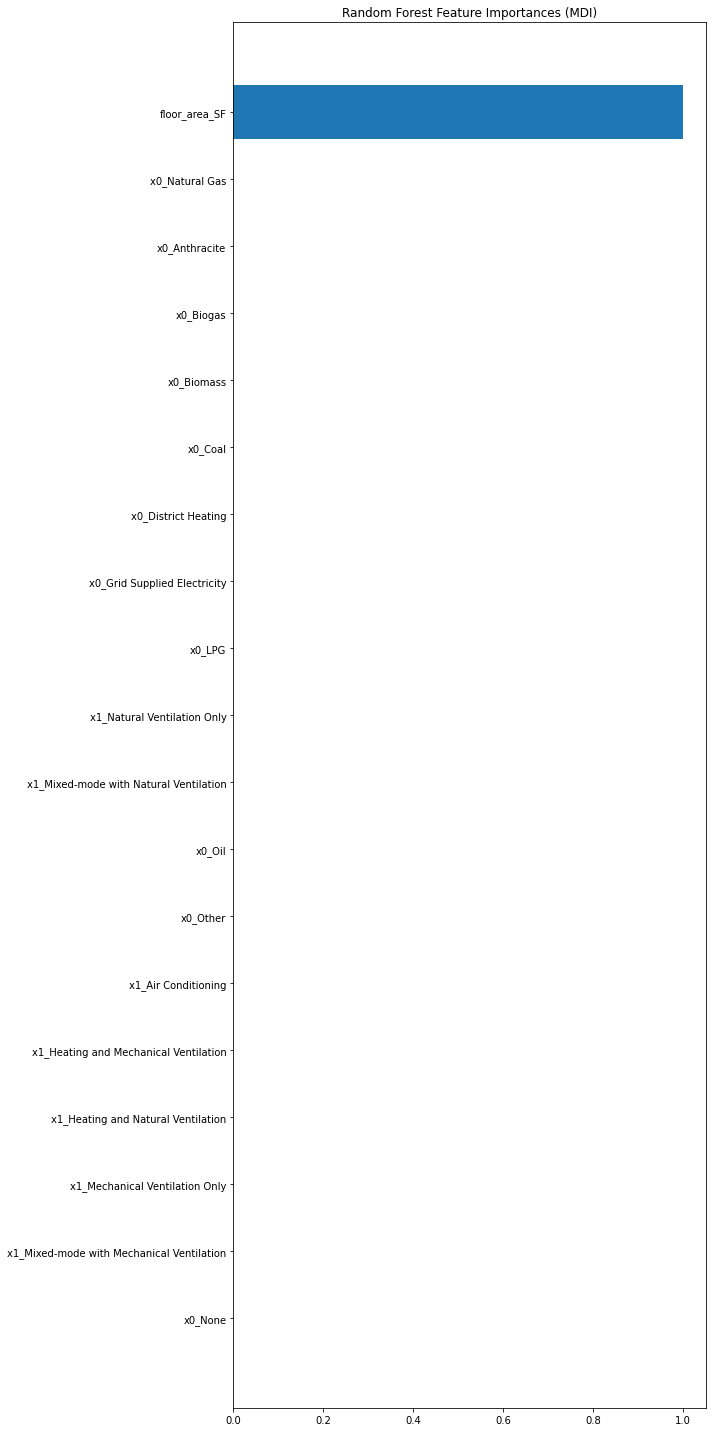

In [24]:
import pylab as plt
tree_feature_importances = (
    rf.feature_importances_)
sorted_idx = tree_feature_importances.argsort()

y_ticks = np.arange(0, len(feature_names))
fig, ax = plt.subplots(figsize=(10,20))
ax.barh(y_ticks, tree_feature_importances[sorted_idx])
ax.set_yticklabels(feature_names[sorted_idx])
ax.set_yticks(y_ticks)
ax.set_title("Random Forest Feature Importances (MDI)")
fig.tight_layout()
plt.show()

Figure 1: Importance chart of the input variables, representing how influential each input variable is on predicting energy use with the random forest regression classifier. Floor area is the most important variable. The other variables of little to no importance.

# useful links and methods and functions I used: 

```df.dropna()``` to remove observation with missing variables

```df.drop(columns, axis=1)``` to remove features (columns)


```np.log10()``` and ```np.isinf()``` to convert to log space and find infinite values  


one hot encoder https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html and https://stackabuse.com/one-hot-encoding-in-python-with-pandas-and-scikit-learn/


KNN imputer https://scikit-learn.org/stable/modules/generated/sklearn.impute.KNNImputer.html , https://www.analyticsvidhya.com/blog/2020/07/knnimputer-a-robust-way-to-impute-missing-values-using-scikit-learn/, and 
https://machinelearningmastery.com/knn-imputation-for-missing-values-in-machine-learning/  

Chicago

In [25]:
chi = pd.read_csv("https://raw.githubusercontent.com/Urban-Informatics-Lab/Open-Data-Benchmarking/master/Chicago/Chicago_Energy_Benchmarking_-_2016_Data_Reported_in_2017.csv")

In [26]:
chi.describe()

,Data Year,ID,Gross Floor Area - Buildings (sq ft),Year Built,# of Buildings,ENERGY STAR Score,Electricity Use (kBtu),Natural Gas Use (kBtu),District Steam Use (kBtu),District Chilled Water Use (kBtu),All Other Fuel Use (kBtu),Site EUI (kBtu/sq ft),Source EUI (kBtu/sq ft),Weather Normalized Site EUI (kBtu/sq ft),Weather Normalized Source EUI (kBtu/sq ft),Total GHG Emissions (Metric Tons CO2e),GHG Intensity (kg CO2e/sq ft),Latitude,Longitude
count,2717.0,2717.000000,2.717000e+03,2712.000000,2717.000000,2300.000000,2.691000e+03,2.478000e+03,6.700000e+01,8.800000e+01,1.700000e+01,2688.000000,2688.000000,2658.000000,2658.000000,2673.000000,2673.000000,2717.000000,2717.000000
mean,2016.0,184277.504233,2.444146e+05,1962.731932,1.408907,60.012609,1.081069e+07,1.191014e+07,2.797624e+07,1.759946e+07,1.100594e+06,94.208408,180.017820,99.133296,184.965500,2630.786495,10.103629,41.885083,-87.653376
std,0.0,59795.814503,3.956004e+05,36.324819,5.181418,28.350327,2.502301e+07,2.785050e+07,5.054843e+07,1.955778e+07,2.637424e+06,125.939184,166.056539,127.267249,166.420203,5794.436792,9.002384,0.068259,0.047320
min,2016.0,100001.000000,5.000000e+04,1872.000000,1.000000,1.000000,5.028900e+03,1.284000e+03,-1.714850e+07,-1.383204e+06,1.587000e+04,0.200000,0.200000,0.300000,0.300000,32.500000,0.400000,41.651404,-87.905562
25%,2016.0,120518.000000,7.491000e+04,1927.750000,1.000000,38.000000,1.948236e+06,3.213429e+06,6.435511e+06,4.815333e+06,4.416000e+04,61.800000,113.875000,65.400000,118.625000,602.100000,6.300000,41.860795,-87.666607
50%,2016.0,173702.000000,1.229450e+05,1969.000000,1.000000,65.000000,4.035714e+06,5.585163e+06,1.343250e+07,9.720848e+06,7.009020e+04,79.400000,148.100000,84.400000,154.050000,1099.500000,8.300000,41.890528,-87.640861
75%,2016.0,251346.000000,2.520760e+05,1997.000000,1.000000,84.000000,9.735142e+06,1.191968e+07,2.439484e+07,2.255981e+07,1.047696e+05,101.050000,196.575000,107.275000,201.575000,2435.700000,11.100000,41.925024,-87.626668
max,2016.0,260184.000000,9.245333e+06,2016.000000,236.000000,100.000000,4.857050e+08,5.493302e+08,3.575457e+08,9.075356e+07,8.912998e+06,5637.700000,6001.500000,5637.700000,6001.500000,127610.000000,304.600000,42.019367,-87.527913


In [27]:
chi.head()

,Data Year,ID,Property Name,Address,ZIP Code,Community Area,Primary Property Type,Gross Floor Area - Buildings (sq ft),Year Built,# of Buildings,ENERGY STAR Score,Electricity Use (kBtu),Natural Gas Use (kBtu),District Steam Use (kBtu),District Chilled Water Use (kBtu),All Other Fuel Use (kBtu),Site EUI (kBtu/sq ft),Source EUI (kBtu/sq ft),Weather Normalized Site EUI (kBtu/sq ft),Weather Normalized Source EUI (kBtu/sq ft),Total GHG Emissions (Metric Tons CO2e),GHG Intensity (kg CO2e/sq ft),Latitude,Longitude,Location
0,2016,254115,Archer Building Lofts Condominium Association,2310 S. Canal Street,60616,Armour Square,Multifamily Housing,99000.0,2000.0,1,96.0,1935003.2,2783435.5,NaN,NaN,NaN,47.7,90.9,46.7,87.8,504.5,5.1,41.884253,-87.63245,"(41.8842525, -87.63245)"
1,2016,254114,HRTL - Town Hall: 3600 N Halsted,3600 North Halsted Street,60613,Lake View,Multifamily Housing,92072.0,2014.0,1,55.0,2477744.2,3147551.1,NaN,NaN,NaN,61.1,120.4,63.6,123.0,623.9,6.8,41.947402,-87.64964,"(41.9474017, -87.64964)"
2,2016,254113,40 E Delaware Condominiums,40 E Delaware,60611,Near North Side,Multifamily Housing,136000.0,1924.0,1,24.0,5724360.2,1951759.8,NaN,NaN,NaN,56.4,147.2,59.8,157.4,1158.8,8.5,41.899208,-87.62729,"(41.8992081, -87.62729)"
3,2016,254109,South Commons - 2901 S Michigan,2901 S Michigan,60616,Douglas,Multifamily Housing,182246.0,1964.0,1,41.0,3158535.8,17010259.2,NaN,NaN,NaN,110.7,152.4,121.1,163.3,1485.7,8.2,41.845860,-87.62921,"(41.8458598, -87.62921)"
4,2016,254107,Columbus on the Park Condominium,811 S Lytle,60607,Near West Side,Multifamily Housing,193497.0,1930.0,1,94.0,3620381.1,5465540.1,NaN,NaN,NaN,47.0,88.4,48.8,89.0,957.6,4.9,41.874295,-87.65018,"(41.8742951, -87.65018)"


In [28]:
# summarize the number of rows with missing values for each column
for c in chi.columns:
  
  # count number of rows with missing values
  n_miss = chi[c].isnull().sum()
  perc = n_miss / chi.shape[0] * 100
  print('%s (%s):  Missing: %d (%.1f%%)' % (c, chi[c].dtype, 
                                                  n_miss, perc))


Data Year (int64):  Missing: 0 (0.0%)
ID (int64):  Missing: 0 (0.0%)
Property Name (object):  Missing: 0 (0.0%)
Address (object):  Missing: 0 (0.0%)
ZIP Code (object):  Missing: 0 (0.0%)
Community Area (object):  Missing: 0 (0.0%)
Primary Property Type (object):  Missing: 0 (0.0%)
Gross Floor Area - Buildings (sq ft) (float64):  Missing: 0 (0.0%)
Year Built (float64):  Missing: 5 (0.2%)
# of Buildings (int64):  Missing: 0 (0.0%)
ENERGY STAR Score (float64):  Missing: 417 (15.3%)
Electricity Use (kBtu) (float64):  Missing: 26 (1.0%)
Natural Gas Use (kBtu) (float64):  Missing: 239 (8.8%)
District Steam Use (kBtu) (float64):  Missing: 2650 (97.5%)
District Chilled Water Use (kBtu) (float64):  Missing: 2629 (96.8%)
All Other Fuel Use (kBtu) (float64):  Missing: 2700 (99.4%)
Site EUI (kBtu/sq ft) (float64):  Missing: 29 (1.1%)
Source EUI (kBtu/sq ft) (float64):  Missing: 29 (1.1%)
Weather Normalized Site EUI (kBtu/sq ft) (float64):  Missing: 59 (2.2%)
Weather Normalized Source EUI (kBtu/sq 

In [29]:
chi.drop(['Data Year', 'ID', 'Property Name', 'Address', 'Community Area', 'All Other Fuel Use (kBtu)', 'District Chilled Water Use (kBtu)', 'District Steam Use (kBtu)'], axis=1, inplace=True)

In [30]:
# summarize the number of rows with missing values for each column
for c in chi.columns:
  
  # count number of rows with missing values
  n_miss = chi[c].isnull().sum()
  perc = n_miss / chi.shape[0] * 100
  print('%s (%s):  Missing: %d (%.1f%%)' % (c, chi[c].dtype, 
                                                  n_miss, perc))

ZIP Code (object):  Missing: 0 (0.0%)
Primary Property Type (object):  Missing: 0 (0.0%)
Gross Floor Area - Buildings (sq ft) (float64):  Missing: 0 (0.0%)
Year Built (float64):  Missing: 5 (0.2%)
# of Buildings (int64):  Missing: 0 (0.0%)
ENERGY STAR Score (float64):  Missing: 417 (15.3%)
Electricity Use (kBtu) (float64):  Missing: 26 (1.0%)
Natural Gas Use (kBtu) (float64):  Missing: 239 (8.8%)
Site EUI (kBtu/sq ft) (float64):  Missing: 29 (1.1%)
Source EUI (kBtu/sq ft) (float64):  Missing: 29 (1.1%)
Weather Normalized Site EUI (kBtu/sq ft) (float64):  Missing: 59 (2.2%)
Weather Normalized Source EUI (kBtu/sq ft) (float64):  Missing: 59 (2.2%)
Total GHG Emissions (Metric Tons CO2e) (float64):  Missing: 44 (1.6%)
GHG Intensity (kg CO2e/sq ft) (float64):  Missing: 44 (1.6%)
Latitude (float64):  Missing: 0 (0.0%)
Longitude (float64):  Missing: 0 (0.0%)
Location (object):  Missing: 0 (0.0%)


In [31]:
chi['total_site_energy_KBTU'] = chi['Gross Floor Area - Buildings (sq ft)'] * chi['Site EUI (kBtu/sq ft)']
chi['log_total_site_energy_KBTU'] = np.log(chi['total_site_energy_KBTU'])

chi

,ZIP Code,Primary Property Type,Gross Floor Area - Buildings (sq ft),Year Built,# of Buildings,ENERGY STAR Score,Electricity Use (kBtu),Natural Gas Use (kBtu),Site EUI (kBtu/sq ft),Source EUI (kBtu/sq ft),Weather Normalized Site EUI (kBtu/sq ft),Weather Normalized Source EUI (kBtu/sq ft),Total GHG Emissions (Metric Tons CO2e),GHG Intensity (kg CO2e/sq ft),Latitude,Longitude,Location,total_site_energy_KBTU,log_total_site_energy_KBTU
0,60616,Multifamily Housing,99000.0,2000.0,1,96.0,1935003.2,2783435.5,47.7,90.9,46.7,87.8,504.5,5.1,41.884253,-87.632450,"(41.8842525, -87.63245)",4722300.0,15.367807
1,60613,Multifamily Housing,92072.0,2014.0,1,55.0,2477744.2,3147551.1,61.1,120.4,63.6,123.0,623.9,6.8,41.947402,-87.649640,"(41.9474017, -87.64964)",5625599.2,15.542838
2,60611,Multifamily Housing,136000.0,1924.0,1,24.0,5724360.2,1951759.8,56.4,147.2,59.8,157.4,1158.8,8.5,41.899208,-87.627290,"(41.8992081, -87.62729)",7670400.0,15.852879
3,60616,Multifamily Housing,182246.0,1964.0,1,41.0,3158535.8,17010259.2,110.7,152.4,121.1,163.3,1485.7,8.2,41.845860,-87.629210,"(41.8458598, -87.62921)",20174632.2,16.819937
4,60607,Multifamily Housing,193497.0,1930.0,1,94.0,3620381.1,5465540.1,47.0,88.4,48.8,89.0,957.6,4.9,41.874295,-87.650180,"(41.8742951, -87.65018)",9094359.0,16.023165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2712,60623,Hospital (General Medical & Surgical),239057.0,1897.0,1,47.0,25863669.7,41427477.1,281.5,521.7,285.8,521.1,6967.6,29.1,41.855136,-87.697840,"(41.85513555, -87.6978405)",67294545.5,18.024590
2713,60649,Multifamily Housing,56412.0,1932.0,1,38.0,952654.3,6014842.5,123.5,165.0,136.2,179.6,495.1,8.8,41.762592,-87.572316,"(41.76259226, -87.57231648)",6966882.0,15.756678
2714,60607,Other - Mall,95204.0,2008.0,1,NaN,6972237.8,1997780.9,94.2,252.0,99.3,263.3,1391.2,14.6,41.866867,-87.641450,"(41.866867, -87.64144957)",8968216.8,16.009197
2715,60607,Office,60000.0,1908.0,1,84.0,2374537.0,1246019.6,60.3,146.1,62.0,145.7,503.9,8.4,41.876426,-87.633355,"(41.87642552, -87.63335549)",3618000.0,15.101432


In [32]:
chi = chi.replace([np.inf, -np.inf], 0)
chi = chi.dropna()
chi.head()

,ZIP Code,Primary Property Type,Gross Floor Area - Buildings (sq ft),Year Built,# of Buildings,ENERGY STAR Score,Electricity Use (kBtu),Natural Gas Use (kBtu),Site EUI (kBtu/sq ft),Source EUI (kBtu/sq ft),Weather Normalized Site EUI (kBtu/sq ft),Weather Normalized Source EUI (kBtu/sq ft),Total GHG Emissions (Metric Tons CO2e),GHG Intensity (kg CO2e/sq ft),Latitude,Longitude,Location,total_site_energy_KBTU,log_total_site_energy_KBTU
0,60616,Multifamily Housing,99000.0,2000.0,1,96.0,1935003.2,2783435.5,47.7,90.9,46.7,87.8,504.5,5.1,41.884253,-87.63245,"(41.8842525, -87.63245)",4722300.0,15.367807
1,60613,Multifamily Housing,92072.0,2014.0,1,55.0,2477744.2,3147551.1,61.1,120.4,63.6,123.0,623.9,6.8,41.947402,-87.64964,"(41.9474017, -87.64964)",5625599.2,15.542838
2,60611,Multifamily Housing,136000.0,1924.0,1,24.0,5724360.2,1951759.8,56.4,147.2,59.8,157.4,1158.8,8.5,41.899208,-87.62729,"(41.8992081, -87.62729)",7670400.0,15.852879
3,60616,Multifamily Housing,182246.0,1964.0,1,41.0,3158535.8,17010259.2,110.7,152.4,121.1,163.3,1485.7,8.2,41.845860,-87.62921,"(41.8458598, -87.62921)",20174632.2,16.819937
4,60607,Multifamily Housing,193497.0,1930.0,1,94.0,3620381.1,5465540.1,47.0,88.4,48.8,89.0,957.6,4.9,41.874295,-87.65018,"(41.8742951, -87.65018)",9094359.0,16.023165


In [33]:
chi.describe()


,Gross Floor Area - Buildings (sq ft),Year Built,# of Buildings,ENERGY STAR Score,Electricity Use (kBtu),Natural Gas Use (kBtu),Site EUI (kBtu/sq ft),Source EUI (kBtu/sq ft),Weather Normalized Site EUI (kBtu/sq ft),Weather Normalized Source EUI (kBtu/sq ft),Total GHG Emissions (Metric Tons CO2e),GHG Intensity (kg CO2e/sq ft),Latitude,Longitude,total_site_energy_KBTU,log_total_site_energy_KBTU
count,2.104000e+03,2104.000000,2104.000000,2104.000000,2.104000e+03,2.104000e+03,2104.000000,2104.000000,2104.000000,2104.000000,2104.000000,2104.000000,2104.000000,2104.000000,2.104000e+03,2104.000000
mean,2.283840e+05,1961.822243,1.355989,59.317490,8.944349e+06,1.130127e+07,90.751759,166.834933,95.778232,171.701854,2282.857605,9.311787,41.887946,-87.654559,2.083556e+07,16.272622
std,3.251700e+05,36.458847,5.563807,28.142021,2.139336e+07,2.289719e+07,133.852635,163.455894,134.454941,163.614945,4971.827516,8.667602,0.068017,0.046900,4.304460e+07,0.948916
min,5.000000e+04,1872.000000,1.000000,1.000000,5.683130e+04,2.651000e+03,4.900000,14.600000,4.900000,14.600000,80.800000,0.800000,41.651404,-87.904210,6.750000e+05,13.422468
25%,7.487000e+04,1927.000000,1.000000,37.750000,1.794606e+06,3.315692e+06,62.700000,111.400000,66.550000,116.375000,572.250000,6.100000,41.865128,-87.667646,5.806190e+06,15.574435
50%,1.202610e+05,1967.000000,1.000000,64.000000,3.536471e+06,5.610707e+06,78.750000,142.500000,83.900000,147.900000,1008.950000,7.900000,41.892228,-87.642700,9.919664e+06,16.110030
75%,2.490155e+05,1997.000000,1.000000,83.000000,8.607172e+06,1.178117e+07,97.850000,181.025000,104.400000,186.000000,2237.325000,10.200000,41.934034,-87.627307,2.094386e+07,16.857356
max,4.518811e+06,2016.000000,236.000000,100.000000,4.686723e+08,5.139386e+08,5637.700000,6001.500000,5637.700000,6001.500000,127610.000000,304.600000,42.019367,-87.533787,1.155374e+09,20.867690


In [34]:
y = chi['log_total_site_energy_KBTU'].values
x1 = chi[['Gross Floor Area - Buildings (sq ft)', 'Year Built', '# of Buildings', 'Latitude', 'Longitude']]
x2 = chi[['Primary Property Type']]


In [35]:
from sklearn.impute import KNNImputer
# Default neighbors is 5
imputer = KNNImputer()
print(imputer.fit_transform(x1))
x1 = imputer.fit_transform(x1)

[[ 9.90000000e+04  2.00000000e+03  1.00000000e+00  4.18842525e+01
  -8.76324500e+01]
 [ 9.20720000e+04  2.01400000e+03  1.00000000e+00  4.19474017e+01
  -8.76496400e+01]
 [ 1.36000000e+05  1.92400000e+03  1.00000000e+00  4.18992081e+01
  -8.76272900e+01]
 ...
 [ 5.64120000e+04  1.93200000e+03  1.00000000e+00  4.17625923e+01
  -8.75723165e+01]
 [ 6.00000000e+04  1.90800000e+03  1.00000000e+00  4.18764255e+01
  -8.76333555e+01]
 [ 3.09056000e+05  1.92800000e+03  1.00000000e+00  4.19074359e+01
  -8.76853802e+01]]


In [36]:
from sklearn.preprocessing import OneHotEncoder
x2 = x2.fillna("None")
x2
encoder = OneHotEncoder(handle_unknown='ignore')
x2 = encoder.fit_transform(x2).toarray()
column_name = encoder.get_feature_names()
x2
one_hot_encoded_frame =  pd.DataFrame(x2, columns= column_name)
one_hot_encoded_frame


,x0_Bank Branch,x0_Courthouse,x0_Financial Office,x0_Hospital (General Medical & Surgical),x0_Hotel,x0_K-12 School,x0_Medical Office,x0_Mixed Use Property,x0_Multifamily Housing,x0_Office,x0_Residence Hall/Dormitory,x0_Retail Store,x0_Senior Care Community,x0_Supermarket/Grocery Store,x0_Wholesale Club/Supercenter,x0_Worship Facility
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2099,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2100,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2101,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2102,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [37]:
x1.shape

(2104, 5)

In [38]:
x2.shape

(2104, 16)

In [39]:
x = np.hstack([x1, x2])
x.shape

(2104, 21)

In [40]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.25, random_state=42)

In [41]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=2, random_state=0)
rf.fit(X_train, y_train,)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=2, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [42]:
rf.score(X_train, y_train)

0.7549212066726896

The R2 for the training set is .755 indicating a good fit of the model when using the training data.

In [43]:
rf.score(X_test, y_test)

0.7096868424317337

The R2 of .709 for the test set is high indicating a good fit of the random forest regression model for energy use using latitude, longitude, number of buildings, year built, floor area, and primary property type. This value is somewhat lower than with the training dataset, but not enough to indicate overfitting.

In [44]:
rf.feature_importances_

array([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.])

In [45]:
names = list(one_hot_encoded_frame.columns.values.tolist())
names.insert(0, 'Longitude')  
names.insert(0, 'Latitude')  

names.insert(0, '# of Buildings')  
names.insert(0, 'Year Built')  
names.insert(0, 'Gross Floor Area - Buildings (sq ft)')  


feature_names = np.array(names)

feature_names

array(['Gross Floor Area - Buildings (sq ft)', 'Year Built',
       '# of Buildings', 'Latitude', 'Longitude', 'x0_Bank Branch',
       'x0_Courthouse', 'x0_Financial Office',
       'x0_Hospital (General Medical & Surgical)', 'x0_Hotel',
       'x0_K-12 School', 'x0_Medical Office', 'x0_Mixed Use Property',
       'x0_Multifamily Housing', 'x0_Office',
       'x0_Residence Hall/Dormitory', 'x0_Retail Store',
       'x0_Senior Care Community', 'x0_Supermarket/Grocery Store',
       'x0_Wholesale Club/Supercenter', 'x0_Worship Facility'],
      dtype='<U40')

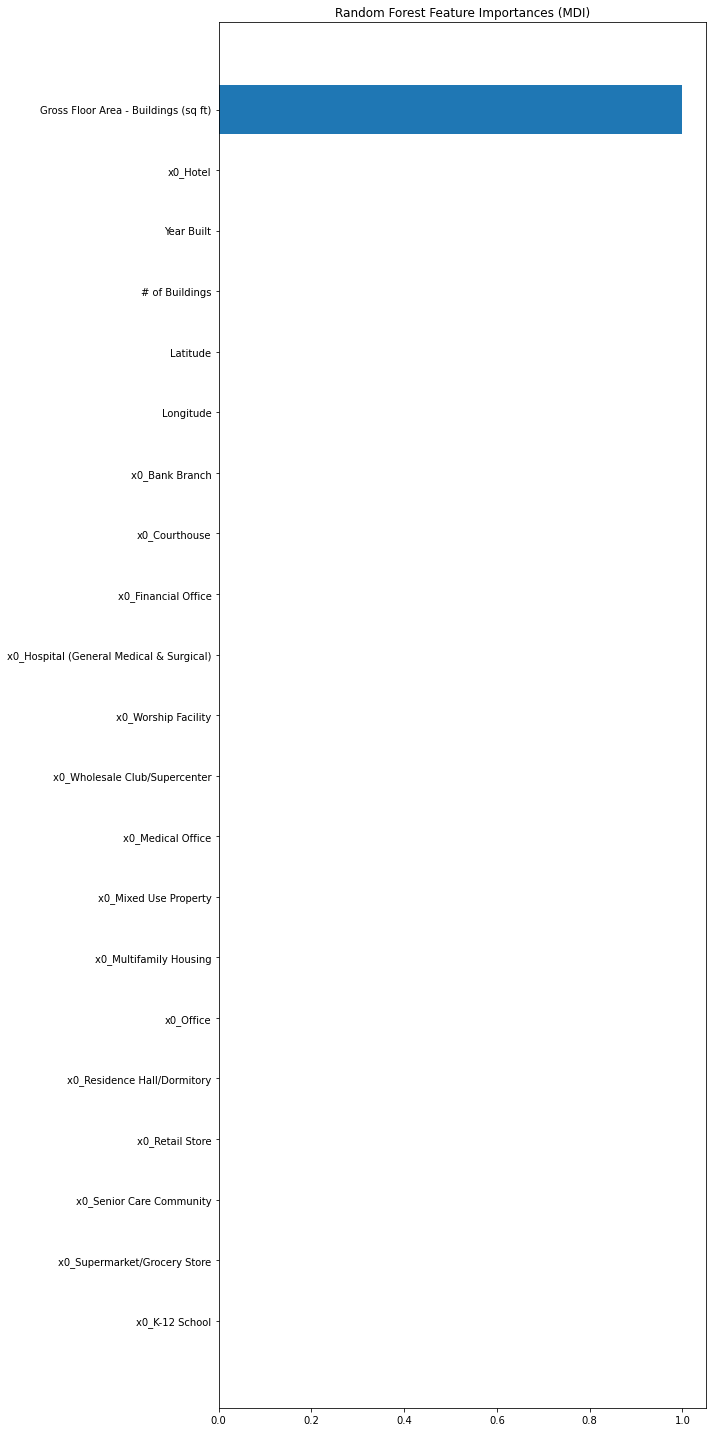

In [46]:
import pylab as plt
tree_feature_importances = (
    rf.feature_importances_)
sorted_idx = tree_feature_importances.argsort()

y_ticks = np.arange(0, len(feature_names))
fig, ax = plt.subplots(figsize=(10,20))
ax.barh(y_ticks, tree_feature_importances[sorted_idx])
ax.set_yticklabels(feature_names[sorted_idx])
ax.set_yticks(y_ticks)
ax.set_title("Random Forest Feature Importances (MDI)")
fig.tight_layout()
plt.show()

Figure 2: Importance chart of the input variables, representing how influential each input variable is on predicting energy use with the random forest regression classifier. Similarly to the London model building size is the most important variable. This result is similar to the London model and the results of the paper which showed area as the most important variable for each city.



Using above and below mean for London

In [47]:
lon = pd.read_csv("https://raw.githubusercontent.com/Urban-Informatics-Lab/Open-Data-Benchmarking/master/London/london_2010.csv")
lon.drop(['RRN', 'RELATED_RRN', 'ISSUE_DATE', 'ORGANISATION_NAME', 'ADDR1', 'ADDR2', 'ADDR3', 'ADDR4', 'POST_TOWN', 'COUNTY_OSGB', 'POSTCODE'], axis=1, inplace=True)
lon['floor_area_SF'] = lon['FLOOR_AREA']*10.7639
lon['total_site_energy_KBTU'] = lon['TYPICAL_ANNUAL_HEAT_TOTAL'] + lon['TYPICAL_ANNUAL_ELEC_TOTAL']*3.41214
lon['log_total_site_energy_KBTU'] = np.log(lon['total_site_energy_KBTU'])
lon['site_eui_KBTUSF'] = lon['total_site_energy_KBTU']/lon['floor_area_SF']
lon = lon.replace([np.inf, -np.inf], 0)

/usr/local/lib/python3.6/dist-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [48]:
m = lon['log_total_site_energy_KBTU'].mean()
m

13.150859205517296

In [49]:
lon['energy_mean'] = (lon['log_total_site_energy_KBTU'] > m) * 1
lon.sort_values('log_total_site_energy_KBTU')

,ENERGY_RATING_BAND,ENERGY_RATING,TOTAL_CO2_EMISSIONS,MAIN_HEATING_FUEL,BUILDING_ENVIRONMENT,FLOOR_AREA,ANNUALENERGYUSEFUELTHERMAL,ANNUALENERGYUSEELECTRICAL,TYPICALENERGYUSEFUELTHERMAL,TYPICALENERGYUSEELECTRICAL,RENEWABLESTHERMAL,RENEWABLESELECTRICAL,ACTUAL_ANNUAL_HEAT_TOTAL,ACTUAL_ANNUAL_ELEC_TOTAL,TYPICAL_ANNUAL_HEAT_TOTAL,TYPICAL_ANNUAL_ELEC_TOTAL,floor_area_SF,total_site_energy_KBTU,log_total_site_energy_KBTU,site_eui_KBTUSF,energy_mean
4373,G,9999,0,Natural Gas,Heating and Natural Ventilation,1327.00,0,0,0,0,0.0,0.0,0.00,0.00,0.000000e+00,0.0,1.428370e+04,0.000000e+00,0.000000,0.000000,0
1334,G,9999,0,Natural Gas,Heating and Natural Ventilation,2349.00,0,0,0,0,0.0,0.0,0.00,0.00,0.000000e+00,0.0,2.528440e+04,0.000000e+00,0.000000,0.000000,0
1333,G,9999,0,Natural Gas,Heating and Natural Ventilation,2432.00,0,0,0,0,0.0,0.0,0.00,0.00,0.000000e+00,0.0,2.617780e+04,0.000000e+00,0.000000,0.000000,0
1332,G,9999,0,Natural Gas,Heating and Natural Ventilation,1358.00,0,0,0,0,0.0,0.0,0.00,0.00,0.000000e+00,0.0,1.461738e+04,0.000000e+00,0.000000,0.000000,0
1331,G,9999,0,Natural Gas,Heating and Natural Ventilation,2189.00,0,0,0,0,0.0,0.0,0.00,0.00,0.000000e+00,0.0,2.356218e+04,0.000000e+00,0.000000,0.000000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5958,E,110,26209,Natural Gas,Mixed-mode with Natural Ventilation,171236.00,238,194,450,94,0.0,0.0,40754168.00,33219784.00,7.705620e+07,16096184.0,1.843167e+06,1.319786e+08,18.698151,71.604266,1
19396,E,116,28817,Natural Gas,Mixed-mode with Natural Ventilation,181819.00,348,165,451,90,0.0,0.0,63273012.00,30000135.00,8.200037e+07,16363710.0,1.957082e+06,1.378356e+08,18.741573,70.429175,1
1075,C,60,14872,Natural Gas,Air Conditioning,174000.00,45,140,364,130,0.0,0.0,7830000.00,24360000.00,6.333600e+07,22620000.0,1.872919e+06,1.405186e+08,18.760850,75.026542,1
14393,E,123,34439,Natural Gas,Heating and Mechanical Ventilation,209408.83,473,132,436,90,0.0,0.0,99050376.59,27641965.56,9.130225e+07,18846794.7,2.254056e+06,1.556102e+08,18.862864,69.035628,1


In [50]:
y = lon['energy_mean'].values
x1 = lon[['floor_area_SF']]
x2 = lon[['MAIN_HEATING_FUEL', 'BUILDING_ENVIRONMENT']]
from sklearn.impute import KNNImputer
# Default neighbors is 5
imputer = KNNImputer()
print(imputer.fit_transform(x1))
x1 = imputer.fit_transform(x1)
x2 = x2.fillna("None")
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore')
x2 = encoder.fit_transform(x2).toarray()
column_name = encoder.get_feature_names()
x2
one_hot_encoded_frame =  pd.DataFrame(x2, columns= column_name)
one_hot_encoded_frame
x = np.hstack([x1, x2])
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.25, random_state=42)

from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=2, random_state=0)
rf.fit(X_train, y_train,)

[[ 13357.9999]
 [ 27038.9168]
 [ 16737.8645]
 ...
 [159477.9424]
 [ 71633.7545]
 [ 19450.3673]]


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=2, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [51]:
rf.score(X_train, y_train)

0.48258126397477885

The R2 for the training set is .483, which is significantly higher than the model using the raw energy consumption. 

In [52]:
rf.score(X_test, y_test)

0.47863021943932543

The R2 for the testing set is .479, which is also significantly higher than the model using the raw energy consumption. 

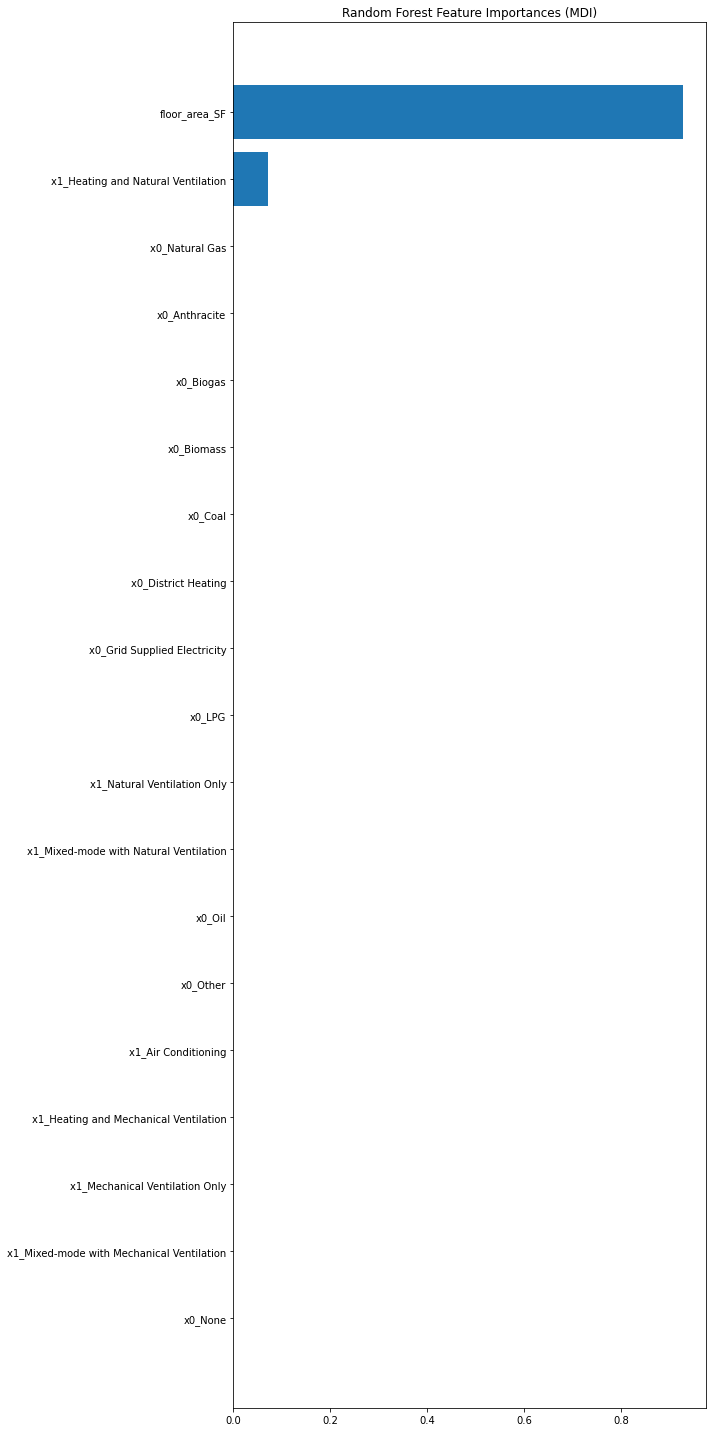

In [53]:
names = list(one_hot_encoded_frame.columns.values.tolist())
names.insert(0, 'floor_area_SF')  
 

feature_names = np.array(names)

feature_names
import pylab as plt
tree_feature_importances = (
    rf.feature_importances_)
sorted_idx = tree_feature_importances.argsort()

y_ticks = np.arange(0, len(feature_names))
fig, ax = plt.subplots(figsize=(10,20))
ax.barh(y_ticks, tree_feature_importances[sorted_idx])
ax.set_yticklabels(feature_names[sorted_idx])
ax.set_yticks(y_ticks)
ax.set_title("Random Forest Feature Importances (MDI)")
fig.tight_layout()
plt.show()

Figure 3: Floor size is still the most important variable, however heating and natural ventilation has a greater importance with this model.

In [54]:
chi = pd.read_csv("https://raw.githubusercontent.com/Urban-Informatics-Lab/Open-Data-Benchmarking/master/Chicago/Chicago_Energy_Benchmarking_-_2016_Data_Reported_in_2017.csv")
chi.drop(['Data Year', 'ID', 'Property Name', 'Address', 'Community Area', 'All Other Fuel Use (kBtu)', 'District Chilled Water Use (kBtu)', 'District Steam Use (kBtu)'], axis=1, inplace=True)
chi['total_site_energy_KBTU'] = chi['Gross Floor Area - Buildings (sq ft)'] * chi['Site EUI (kBtu/sq ft)']
chi['log_total_site_energy_KBTU'] = np.log(chi['total_site_energy_KBTU'])
chi = chi.replace([np.inf, -np.inf], 0)

m = chi['log_total_site_energy_KBTU'].mean()
chi['energy_mean'] = (chi['log_total_site_energy_KBTU'] > m) * 1
chi.sort_values('log_total_site_energy_KBTU')

chi = chi.dropna()
y = chi['energy_mean'].values
x1 = chi[['Gross Floor Area - Buildings (sq ft)', 'Year Built', '# of Buildings', 'Latitude', 'Longitude']]
x2 = chi[['Primary Property Type']]
from sklearn.impute import KNNImputer
# Default neighbors is 5
imputer = KNNImputer()
print(imputer.fit_transform(x1))
x1 = imputer.fit_transform(x1)
from sklearn.preprocessing import OneHotEncoder
x2 = x2.fillna("None")
x2
encoder = OneHotEncoder(handle_unknown='ignore')
x2 = encoder.fit_transform(x2).toarray()
column_name = encoder.get_feature_names()
x2
one_hot_encoded_frame =  pd.DataFrame(x2, columns= column_name)
one_hot_encoded_frame
x = np.hstack([x1, x2])
              
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    x, y, test_size=0.25, random_state=42)
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=2, random_state=0)
rf.fit(X_train, y_train,)

[[ 9.90000000e+04  2.00000000e+03  1.00000000e+00  4.18842525e+01
  -8.76324500e+01]
 [ 9.20720000e+04  2.01400000e+03  1.00000000e+00  4.19474017e+01
  -8.76496400e+01]
 [ 1.36000000e+05  1.92400000e+03  1.00000000e+00  4.18992081e+01
  -8.76272900e+01]
 ...
 [ 5.64120000e+04  1.93200000e+03  1.00000000e+00  4.17625923e+01
  -8.75723165e+01]
 [ 6.00000000e+04  1.90800000e+03  1.00000000e+00  4.18764255e+01
  -8.76333555e+01]
 [ 3.09056000e+05  1.92800000e+03  1.00000000e+00  4.19074359e+01
  -8.76853802e+01]]


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=2, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=0, verbose=0, warm_start=False)

In [55]:
rf.score(X_train, y_train)

0.649309603995577

The R2 for this model using the training data is .649, which is lower than the original model.

In [56]:
rf.score(X_test, y_test)

0.6657343690758135

The R2 for this model using the testing data is .666, which is lower than the original model.

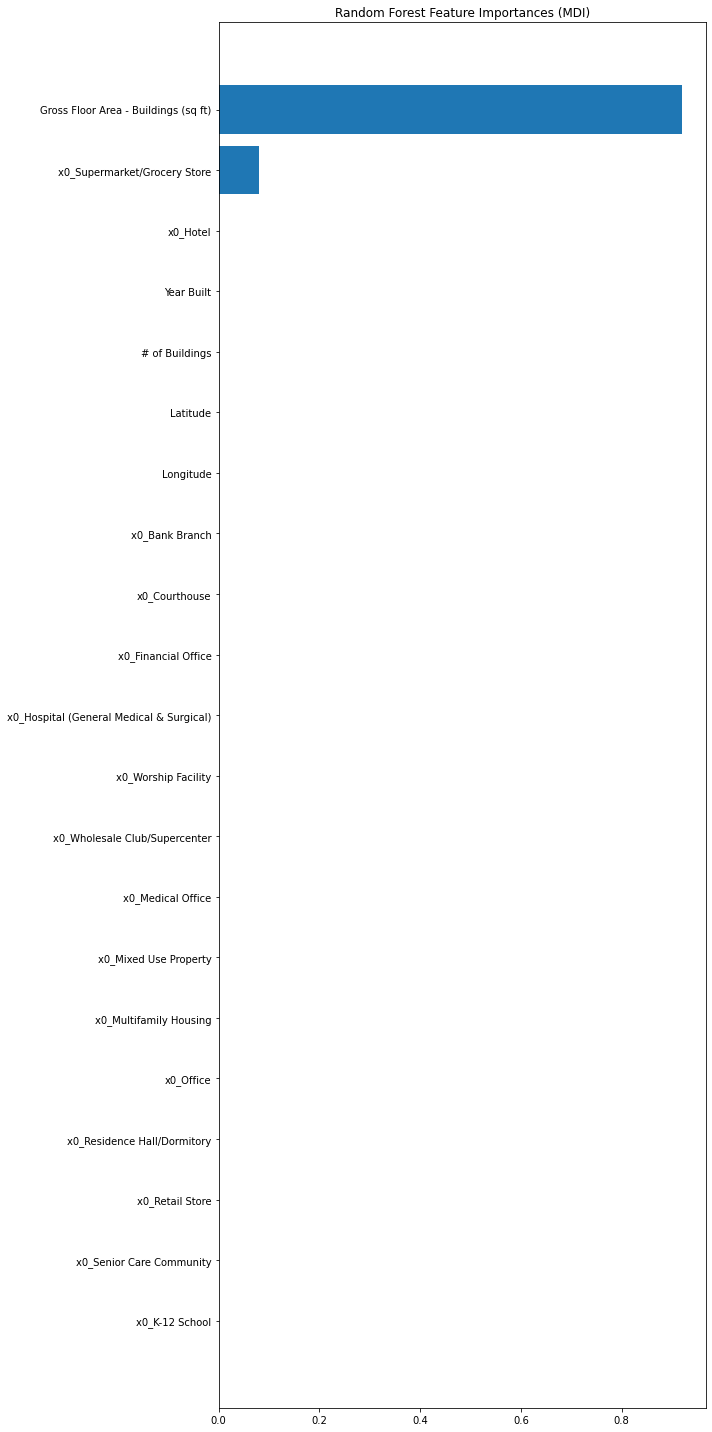

In [57]:
names = list(one_hot_encoded_frame.columns.values.tolist())
names.insert(0, 'Longitude')  
names.insert(0, 'Latitude')  

names.insert(0, '# of Buildings')  
names.insert(0, 'Year Built')  
names.insert(0, 'Gross Floor Area - Buildings (sq ft)')  


feature_names = np.array(names)

feature_names
import pylab as plt
tree_feature_importances = (
    rf.feature_importances_)
sorted_idx = tree_feature_importances.argsort()

y_ticks = np.arange(0, len(feature_names))
fig, ax = plt.subplots(figsize=(10,20))
ax.barh(y_ticks, tree_feature_importances[sorted_idx])
ax.set_yticklabels(feature_names[sorted_idx])
ax.set_yticks(y_ticks)
ax.set_title("Random Forest Feature Importances (MDI)")
fig.tight_layout()
plt.show()

Figure 4: The importance plot shows that floor size is still the most important variable, however supermarkets now have more importance.